In [413]:
import pandas as pd

In [414]:
df = pd.read_csv("data_preprocessed.csv")
df.head()

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_age,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,is_holiday,region_size_numeric,approval_flag
0,422206773,58.0,0,No,NaN,NaN,NaN,NaN,NaN,NaN,...,30,W,NaN,1,NaN,NaN,1,0,0,0
1,348648289,44.0,1,rural,0.0,0.0,0.0,0.0,1.0,1.0,...,36,W,NaN,2,RUS,NaN,2,0,4,0
2,345496995,23.0,0,town,0.0,0.0,1.0,0.0,1.0,0.0,...,52,W,NaN,6,NaN,NaN,4,0,1,1
3,138498254,30.0,1,No,NaN,NaN,NaN,NaN,NaN,NaN,...,51,W,NaN,7,NaN,NaN,0,0,0,0
4,64946855,31.0,1,town,0.0,0.0,0.0,0.0,1.0,0.0,...,43,W,NaN,6,RUS,UNM,4,0,1,0


In [415]:
df.shape

(15567, 32)

In [ ]:
df = df.dropna(columns=["partnership_flg"])

In [416]:
mean_talk = df["state_talk_time_sec"].mean()
df["is_long"] = df["state_talk_time_sec"] > mean_talk
df.groupby("approval_flag")["is_long"].mean().reset_index()

,approval_flag,is_long
0,0,0.285714
1,1,0.877843


In [417]:
df.groupby("approval_flag")["state_talk_time_sec"].mean().reset_index()

,approval_flag,state_talk_time_sec
0,0,56.249715
1,1,148.852502


Зависимость длительности звонка и успешности

In [418]:
from scipy.stats import shapiro, mannwhitneyu

normal_calls = df[df["state_talk_time_sec"] <= mean_talk]["approval_flag"]
long_calls = df[df["state_talk_time_sec"] > mean_talk]["approval_flag"]

# Тест на нормальность
shapiro_norm = shapiro(normal_calls)
shapiro_long = shapiro(long_calls)

# Результаты теста Шапиро-Уилка
print(f"Статистика: {shapiro_norm.statistic}, p-значение: {shapiro_norm.pvalue}")

print(f"Статистика: {shapiro_long.statistic}, p-значение: {shapiro_long.pvalue}")

# Выполнение теста Манна-Уитни
u_stat, p_value_mw = mannwhitneyu(normal_calls, long_calls)

# Результаты теста
print("Тест Манна-Уитни:")
print(f"U-статистика: {u_stat}, p-значение: {p_value_mw}")

# Проверка на значимость
is_significant_mw = p_value_mw < 0.05
print("Значимость теста Манна-Уитни (p < 0.05):", is_significant_mw)

Статистика: 0.11269541542463701, p-значение: 1.0614919996074597e-112
Статистика: 0.5403348028584449, p-значение: 5.36437484802561e-80
Тест Манна-Уитни:
U-статистика: 20960578.0, p-значение: 0.0
Значимость теста Манна-Уитни (p < 0.05): True


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10208.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5359.
  res = hypotest_fun_out(*samples, **kwds)


Зависимость дня недели и успешности звонка

In [419]:
from scipy.stats import chi2_contingency

# Создание контингентной таблицы
contingency_table = pd.crosstab(df['is_holiday'], df['approval_flag'])

# Выполнение теста хи-квадрат
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Результаты теста
print("Тест хи-квадрат:")
print(f"Хи-квадрат статистика: {chi2_stat}")
print(f"p-значение: {p_value}")
print(f"Степени свободы: {dof}")
print("Ожидаемые частоты:")
print(expected)

# Проверка на значимость
is_significant_chi2 = p_value < 0.05
print("Значимость теста хи-квадрат (p < 0.05):", is_significant_chi2)

Тест хи-квадрат:
Хи-квадрат статистика: 4.176960817366622
p-значение: 0.040977120378438585
Степени свободы: 1
Ожидаемые частоты:
[[12635.74330314  1386.25669686]
 [ 1392.25669686   152.74330314]]
Значимость теста хи-квадрат (p < 0.05): True


In [420]:
df.groupby("approval_flag")["age"].mean()

approval_flag
0    37.885814
1    37.243015
Name: age, dtype: float64

Зависимость успешности звонка и возраста

In [421]:
from scipy.stats import shapiro, mannwhitneyu

success_age = df[df["approval_flag"] == 0]["age"]
unsuccess_age = df[df["approval_flag"] == 1]["age"]

# Тест на нормальность для праздничных разговоров
shapiro_holiday = shapiro(success_age)
shapiro_not_holiday = shapiro(unsuccess_age)

# Результаты теста Шапиро-Уилка
print("Тест Шапиро-Уилка для праздничных разговоров:")
print(f"Статистика: {shapiro_holiday.statistic}, p-значение: {shapiro_holiday.pvalue}")

print("\nТест Шапиро-Уилка для непраздничных разговоров:")
print(f"Статистика: {shapiro_not_holiday.statistic}, p-значение: {shapiro_not_holiday.pvalue}")

# Выполнение теста Манна-Уитни
u_stat, p_value_mw = mannwhitneyu(success_age, unsuccess_age)

# Результаты теста
print("Тест Манна-Уитни:")
print(f"U-статистика: {u_stat}, p-значение: {p_value_mw}")

# Проверка на значимость
is_significant_mw = p_value_mw < 0.05
print("Значимость теста Манна-Уитни (p < 0.05):", is_significant_mw)

Тест Шапиро-Уилка для праздничных разговоров:
Статистика: 0.9761516008993104, p-значение: 6.521632923447075e-43

Тест Шапиро-Уилка для непраздничных разговоров:
Статистика: 0.9792255058177661, p-значение: 3.992990531267659e-14
Тест Манна-Уитни:
U-статистика: 11044540.0, p-значение: 0.13510454317844786
Значимость теста Манна-Уитни (p < 0.05): False


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14028.
  res = hypotest_fun_out(*samples, **kwds)


In [422]:
df["approval_flag"].value_counts()

approval_flag
0    14028
1     1539
Name: count, dtype: int64

In [423]:
df["bundle_nm"].isna().sum()

11713

In [424]:
df["bundle_nm"].value_counts()

bundle_nm
Pro        3615
Premium     238
XXX           1
Name: count, dtype: int64

In [425]:
df["bundle_nm"] = df["bundle_nm"].replace("XXX", 0)
df["bundle_nm"] = df["bundle_nm"].fillna(0)
df["bundle_nm"] = df["bundle_nm"].replace("Pro", 1)
df["bundle_nm"] = df["bundle_nm"].replace("Premium", 1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10164\3617172054.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["bundle_nm"] = df["bundle_nm"].replace("Premium", 1)


In [426]:
from scipy.stats import chi2_contingency

# Создание контингентной таблицы
contingency_table = pd.crosstab(df['bundle_nm'], df['approval_flag'])

# Выполнение теста хи-квадрат
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Результаты теста
print("Тест хи-квадрат:")
print(f"Хи-квадрат статистика: {chi2_stat}")
print(f"p-значение: {p_value}")
print(f"Степени свободы: {dof}")
print("Ожидаемые частоты:")
print(expected)

# Проверка на значимость
is_significant_chi2 = p_value < 0.05
print("Значимость теста хи-квадрат (p < 0.05):", is_significant_chi2)

Тест хи-квадрат:
Хи-квадрат статистика: 6.641659976307193
p-значение: 0.009962106711800481
Степени свободы: 1
Ожидаемые частоты:
[[10555.91905955  1158.08094045]
 [ 3472.08094045   380.91905955]]
Значимость теста хи-квадрат (p < 0.05): True


In [427]:
df.groupby("approval_flag")["is_holiday"].mean()

approval_flag
0    0.097591
1    0.114360
Name: is_holiday, dtype: float64

Зависимость дня недели от длительности звонка

In [428]:
from scipy.stats import shapiro, mannwhitneyu

holiday_talk = df[df["is_holiday"] == 1]["state_talk_time_sec"]
not_holiday_talk = df[df["is_holiday"] == 0]["state_talk_time_sec"]

# Тест на нормальность для праздничных разговоров
shapiro_holiday = shapiro(holiday_talk)
shapiro_not_holiday = shapiro(not_holiday_talk)

# Результаты теста Шапиро-Уилка
print("Тест Шапиро-Уилка для праздничных разговоров:")
print(f"Статистика: {shapiro_holiday.statistic}, p-значение: {shapiro_holiday.pvalue}")

print("\nТест Шапиро-Уилка для непраздничных разговоров:")
print(f"Статистика: {shapiro_not_holiday.statistic}, p-значение: {shapiro_not_holiday.pvalue}")

# Выполнение теста Манна-Уитни
u_stat, p_value_mw = mannwhitneyu(holiday_talk, not_holiday_talk)

# Результаты теста
print("Тест Манна-Уитни:")
print(f"U-статистика: {u_stat}, p-значение: {p_value_mw}")

# Проверка на значимость
is_significant_mw = p_value_mw < 0.05
print("Значимость теста Манна-Уитни (p < 0.05):", is_significant_mw)


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14022.
  res = hypotest_fun_out(*samples, **kwds)


Тест Шапиро-Уилка для праздничных разговоров:
Статистика: 0.8285706975616686, p-значение: 8.464894033875045e-38

Тест Шапиро-Уилка для непраздничных разговоров:
Статистика: 0.8079891479744433, p-значение: 2.0652670756068684e-83
Тест Манна-Уитни:
U-статистика: 11274327.0, p-значение: 0.008324475483670995
Значимость теста Манна-Уитни (p < 0.05): True


In [429]:
df["partnership_flg"].isna().sum()

6162

In [430]:
df["partnership_flg"].value_counts()

partnership_flg
1.0    7537
0.0    1868
Name: count, dtype: int64

In [431]:
df.shape

(15567, 33)

In [432]:
# from scipy.stats import shapiro, mannwhitneyu

# df_workdays = df[df["is_holiday"] == 0]

# holiday_talk = df[df[""]][""]
# not_holiday_talk = df[df[""]][""]

# # Тест на нормальность для праздничных разговоров
# shapiro_holiday = shapiro(holiday_talk)
# shapiro_not_holiday = shapiro(not_holiday_talk)

# # Результаты теста Шапиро-Уилка
# print("Тест Шапиро-Уилка для праздничных разговоров:")
# print(f"Статистика: {shapiro_holiday.statistic}, p-значение: {shapiro_holiday.pvalue}")

# print("\nТест Шапиро-Уилка для непраздничных разговоров:")
# print(f"Статистика: {shapiro_not_holiday.statistic}, p-значение: {shapiro_not_holiday.pvalue}")


In [433]:
df.groupby("approval_flag")["gender_cd"].mean().reset_index()

,approval_flag,gender_cd
0,0,0.523810
1,1,0.563353


In [434]:
from scipy.stats import chi2_contingency

# Создание контингентной таблицы
contingency_table = pd.crosstab(df['gender_cd'], df['approval_flag'])

# Выполнение теста хи-квадрат
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Результаты теста
print("Тест хи-квадрат:")
print(f"Хи-квадрат статистика: {chi2_stat}")
print(f"p-значение: {p_value}")
print(f"Степени свободы: {dof}")
print("Ожидаемые частоты:")
print(expected)

# Проверка на значимость
is_significant_chi2 = p_value < 0.05
print("Значимость теста хи-квадрат (p < 0.05):", is_significant_chi2)

Тест хи-квадрат:
Хи-квадрат статистика: 8.543121476716166
p-значение: 0.003468303473218822
Степени свободы: 1
Ожидаемые частоты:
[[6625.1593756  726.8406244]
 [7402.8406244  812.1593756]]
Значимость теста хи-квадрат (p < 0.05): True


In [435]:
df.groupby("gender_cd")["state_talk_time_sec"].mean().reset_index()

,gender_cd,state_talk_time_sec
0,0,58.417165
1,1,71.658186


In [436]:
from scipy.stats import shapiro, mannwhitneyu

man_talk = df[df["gender_cd"] == 1]["state_talk_time_sec"]
women_talk = df[df["gender_cd"] == 0]["state_talk_time_sec"]

# Тест на нормальность для праздничных разговоров
shapiro_man = shapiro(man_talk)
shapiro_women = shapiro(women_talk)

# Результаты теста Шапиро-Уилка
print("Тест Шапиро-Уилка для мужчин клиентов:")
print(f"Статистика: {shapiro_man.statistic}, p-значение: {shapiro_man.pvalue}")

print("\nТест Шапиро-Уилка для женщин клиентов:")
print(f"Статистика: {shapiro_women.statistic}, p-значение: {shapiro_women.pvalue}")

# Выполнение теста Манна-Уитни
u_stat, p_value_mw = mannwhitneyu(holiday_talk, not_holiday_talk)

# Результаты теста
print("Тест Манна-Уитни:")
print(f"U-статистика: {u_stat}, p-значение: {p_value_mw}")

# Проверка на значимость
is_significant_mw = p_value_mw < 0.05
print("Значимость теста Манна-Уитни (p < 0.05):", is_significant_mw)


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8215.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7352.
  res = hypotest_fun_out(*samples, **kwds)


Тест Шапиро-Уилка для мужчин клиентов:
Статистика: 0.8356850463805261, p-значение: 3.83493105875458e-68

Тест Шапиро-Уилка для женщин клиентов:
Статистика: 0.778462043238838, p-значение: 7.725435213640366e-72
Тест Манна-Уитни:
U-статистика: 11274327.0, p-значение: 0.008324475483670995
Значимость теста Манна-Уитни (p < 0.05): True


<Axes: xlabel='gender_cd', ylabel='Count'>

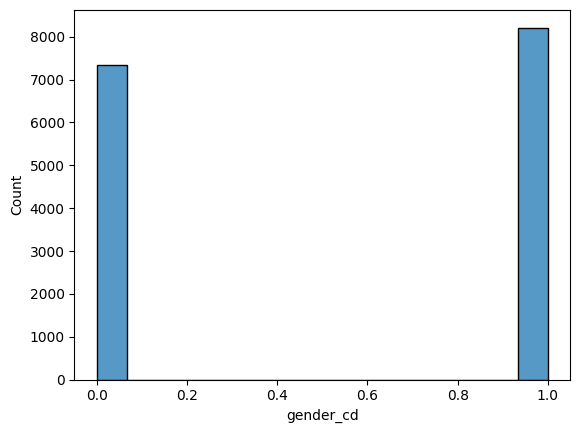

In [437]:
import seaborn as sns

sns.histplot(df['gender_cd'])

In [438]:
df["emp_gender_cd"].isna().sum()

1874

<Axes: xlabel='emp_gender_cd', ylabel='Count'>

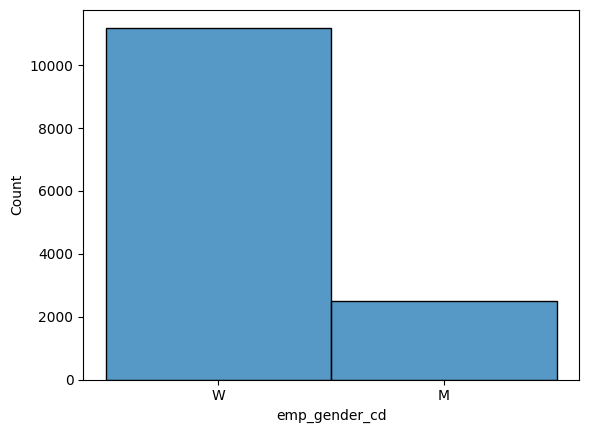

In [439]:
sns.histplot(df["emp_gender_cd"])

In [440]:
data = df.copy()
data["gender_cd"] = data["gender_cd"].replace({0: "W", 1: "M"})

In [441]:
data.groupby(["emp_gender_cd", "gender_cd"])["approval_flag"].mean().reset_index()

,emp_gender_cd,gender_cd,approval_flag
0,M,M,0.108169
1,M,W,0.076401
2,W,M,0.103536
3,W,W,0.094093


In [442]:
df.groupby("approval_flag")["state_talk_time_sec"].mean().reset_index()

,approval_flag,state_talk_time_sec
0,0,56.249715
1,1,148.852502


In [443]:
df.groupby("approval_flag")["age"].mean().reset_index()

,approval_flag,age
0,0,37.885814
1,1,37.243015


In [444]:
df.groupby("approval_flag")["is_holiday"].mean().reset_index()

,approval_flag,is_holiday
0,0,0.097591
1,1,0.114360


In [445]:
df.groupby("approval_flag")["bundle_nm"].mean().reset_index()

,approval_flag,bundle_nm
0,0,0.250499
1,1,0.220273


In [446]:
# df = df.dropna(subset=["emp_gender_cd"])

In [447]:
# df["emp_gender_cd"].value_counts()

In [448]:
# df["emp_gender_cd"] = df["emp_gender_cd"].fillna("W")

In [449]:
# df["emp_gender_cd"] = df["emp_gender_cd"].replace({"W":0, "M":1})

In [450]:
# df.groupby("approval_flag")["emp_gender_cd"].mean()